# DAX-Projekt: Datenbeschaffung auf die andere Art

Nach dem Enron-Fall möchten wir uns als nächstes einem anderen Wirtschaftsthema widmen, nämlich der Deutschen Börse.

Die Beschaffungswege um an Daten heranzukommen sind immer noch die selbigen:

A) Die Daten liegen im Netz zum direkten Download bereit (wenn wir Glück haben sogar im kuratierten Zustand). Dabei können die Daten beispielhaft in folgenden Formaten sein:

    strukturiert: csv, xls, xlsx, parquet, orc
    semistrukturiert: html, json, yaml, xml, rdf, sql
    unstrukturiert: ppt, pptx, pdf, docx, zip, pst, png, img, mp3, avi, mp4

B) Die Daten werden über eine Schnittstelle (API) angeboten und können darüber abgegriffen werden

C) Die Daten, die uns interessieren sind nicht einfach herunterladbar und wir müssen sie von Webseiten aus der HTML-Repräsentation abgreifen (web scraping).

Wir möchten zu Beginn erstmal nur Informationen sammeln, nämlich welche Unternehmen derzeit überhaupt im DAX gelistet sind. Das finden wir zum Beispiel durch die entsprechende Seite von Wikipedia heraus *https://en.wikipedia.org/wiki/DAX*. Wenn man Daten von einer Webseite ziehen möchte, ist es oft eine gute Idee, sich erst mal anzusehen, wie die Seite aufgebaut ist. Klicke auf den Link und schau dir die Seite kurz an.

Die aktuellen Unternehmen sind unter der Überschrift **Components** in einer Tabelle gelistet. Diese werden wir später auslesen. 



---

# Aufgabe 1: Datenabzug über HTML

Zuerst verbinden wir uns mit der Webseite. Daten werden im Internet meist mit Hilfe von HTTPS (Hypertext Transfer Protocol Secure) übertragen. Das ist eine verschlüsselte Variante von HTTP ([Hyptertext Transfer Protocol](https://de.wikipedia.org/wiki/Hypertext_Transfer_Protocol)). Dabei wird durch den Browser eine Anfrage an den Server geschickt und dieser schickt eine Antwort zurück.

- Importiere das Modul `requests`
- Durch `requests` können wir die Anfrage auch ohne Browser an den Webserver schicken. Dazu stellt das Modul die Funktion `requests.get()` bereit. Speichere die Adresse der Wikipedia-Seite als *string* in der Variablen `website_url`. Überreiche diese Variable an `requests.get()` und speichere das Ergebnis als `response`. Drucke es anschließend aus.

In [2]:
import requests
website_url = 'https://en.wikipedia.org/wiki/DAX'
response = requests.get(website_url)
response

<Response [200]>

Du solltest etwas wie `<Response [200]>` erhalten haben. Wir erinnern uns, es gibt fünf Zahlenräume für die Statuscodes:

| Zahlenraum | Bedeutung |
| ---------- | --------- |
| 1XX | Die Anfrage wurde erhalten (Information) |
| 2XX | Die Anfrage wurde erhalten und akzeptiert (Erfolgreiche Anfrage) |
| 3XX | Weitere Aktionen werden durchgeführt, um die Anfrage zu erfüllen (Umleitung) |
| 4XX | Die Anfrage kann nicht umgesetzt werden, was vermutlich am Client liegt (Client-Fehler) |
| 5XX | Die Anfrage kann nicht umgesetzt werden, was vermutlich am Server liegt (Server-Fehler) |

Die nächsten beiden Zahlen spezifizieren die Antwort. Eine umfangreiche Liste der Codes kannst du [hier](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes) finden.

Wir haben eine 200 erhalten. Dieser Code steht dafür, dass alles rund gelaufen ist. Weitere wichtige Codes sind folgende:
* 401 (der Zugriff auf die gesuchten Informationen wurde verweigert, evtl. wegen fehlender/fehlerhafter Authentifizierung)
* 404 (die gesuchten Informationen wurden nicht gefunden)
* 429 (zu viele Anfragen wurden in einem bestimmten Zeitfenster gestellt)

Schauen wir uns unsere Antwort nun etwas genauer an. Welchen Datentyp hat sie?

In [ ]:
type(response)

Neben dem Statuscode können wir weitere Informationen aus unserer Antwort ziehen. Drucke das Attribut `my_response.headers`.

In [ ]:
response.headers

Der Output ist auf den ersten Blick etwas unübersichtlich. Aber an den geschweiften Klammern erkennen wir, dass es sich vermutlich um ein *dictionary* handelt. Das stimmt so aber noch nicht ganz. Da die Headerdaten für die Kommunikation mittels HTTP als *case-insensitive* definiert wurden, gilt das auch für `my_response.headers`. Es ist also egal, ob die Buchstaben der *keys* groß oder klein sind.
`my_response.headers` enthält Metadaten zu der Antwort, die wir erhalten haben. Welche Werte stecken hinter den *keys* `'content-type'` und `'date'`? Gib sie aus.

Tipp: Wie eben erwähnt sind die *keys* hier, im Gegensatz zum normalen `dict`, nicht anfällig für Groß- und Kleinschreibung. Es ist also egal, ob du `'content-type'` oder `'CONTENT-type'` schreibst.

In [ ]:
print(response.headers['content-type'])
print(response.headers['Date'])

`'Date'` gibt uns Datum und Uhrzeit der Server-Antwort zurück, wie du vielleicht schon vermutet hast. `'content-type'` gibt an, welche Art von Inhalt wir erhalten haben. In unserem Fall ist das ein Text, der mit `'UTF-8'` kodiert ist und HTML-Code enthält. Wirf einen Blick in den Text, indem du das Attribut `my_response.text` ausgibst.

In [ ]:
response.text

in diesem HTML-Code steckt unsere DAX-Auflistung.
Das sieht jetzt auf den ersten Blick ganz schön wüst aus. Daten in HTML-Form sind aber nicht gänzlich unstrukturiert. Man nennt sie semistrukturiert. Semistrukturierte Daten tragen einen Teil der Strukturinformationen mit sich, anstatt wie eine Tabelle bereits einer allgemeinen Struktur zu unterliegen. Dir sind vielleicht schon weitere semistrukturierte Datenformate über den Weg gelaufen. Dazu gehören beispielsweise [JSON](https://de.wikipedia.org/wiki/JavaScript_Object_Notation) und [XML](https://de.wikipedia.org/wiki/Extensible_Markup_Language). 
Im weiteren Verlauf wirst du sehen, was es heißt, dass HTML einen Teil der Strukturinformationen mit sich trägt.

Wenn man Daten strukturiert, sollte man auf 3 Prinzipien achten, um sicherzustellen, dass die Daten möglichst einfach für automatisierte Auswertungen und Modelle verwendet werden können. Diese Prinzipien werden häufig tidy data principles genannt. Sie lauten wie folgt:

Jede Beobachtung hat eine eigene Zeile
Jede Variable hat eine eigene Spalte
Jeder Wert hat eine eigene Zelle
In diesem Kapitel werden wir öffentlich zugängliche Daten von Webseiten auslesen und diese anschließend in eine strukturierte Form gemäß diesen Prinzipien bringen. Also so, wie wir selbst gerne Daten erhalten würden.

---

# Aufgabe 2: HTML Grundlagen

Wenn die Abfrage erfolgreich vom Server verarbeitet wurde, befindet sich nun der HTML-Code der Webseite im Attribut `my_response.text`. Drucke die ersten 125 Zeichen deines Textes und wirf einen Blick hinein.

In [3]:
response.text[:125]

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>DAX - Wikipedia</title>\n'

Du solltest in etwa folgenden Text erhalten:

`'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>DAX - Wikipedia</title>\n'`

Wir sehen hier schon die typische Struktur eines HTML-Dokuments. HTML steht für *Hypertext Markup Language* und ist eine Auszeichnungssprache, welche 1992 von der Europäischen Organisation für Kernforschung (CERN) verbreitet wurde. HTML ist fester Bestandteil des *World Wide Web*, eine grundlegende Kenntnis darüber ist also beim *web scraping* hilfreich.

Auszeichnungssprachen wie HTML zeichnen sich dadurch aus, dass man Elemente (z.B. Textabsätze, Bilder oder Animationen) mit Eigenschaften, Zugehörigkeiten und Darstellungsformen anreichern kann. Dies geschieht in der Regel, indem man sie mit sogenannten Tags markiert. Dabei handelt es sich um die Strukturinformationen, die wir in der letzten Übung erwähnt haben.

Jedes HTML-Dokument hat einen festen Aufbau, der wie folgt aussieht:

```html
<!DOCTYPE html>
<html lang="en">
  <head>
    Der Kopf enthält Informationen über das Dokument. Diese werden als eigene Elemente dargestellt.
    <title>Hier steht der Titel</title>
    ...
  </head>
  <body>
    Hier steht der Webseiten-Körper. Er ist das, was im Browser dargestellt wird.
    ...
  </body>
</html>

```
In HTML siehst du oft die Kombination aus einem Wort in spitzen Klammern, Text dazwischen und dem gleichen Wort in spitzen Klammern und einem Schrägstrich `'/'`, z.B. `'<title>DAX - Wikipedia</title>'`. Das sind die Tags. Diese geben dem ganzen Dokument ihre Struktur. Mit der ersten Nennung öffnen sie ein Element, z.B. den Titel. Der folgende Text entspricht dem Wert dieses Elements (z.B. `'DAX - Wikipedia'`). Die Nennung mit einem Schrägstrich (z.B. `'</title>'`) beendet das Element. Innerhalb eines Elements kann man auch neue Elemente anfangen, sie lassen sich also verschachteln. Die Verschachtelung wird im Beispiel des Aufbaus durch die Einrückung signalisiert.

HTML-Tags können nicht nur Text beinhalten, sondern auch Attribute. Diese geben weitere Informationen zum Element. Ein Beispiel hierfür siehst du im `<html>`-Tag. Dieses hat z.B. das Attribut `lang='en'`, welches die Sprache des Dokuments als Englisch spezifiziert.

HTML kennt zahlreiche Tags und noch mehr Attribute, diese hat man in der Regel nicht alle im Kopf. Deshalb bieten dir Browser wie Firefox und Chrome spezielle Tools an, um diese Informationen auf einer Seite anzuzeigen. Bei Firefox handelt es sich um den [*Page Inspector*](https://developer.mozilla.org/en-US/docs/Tools/Page_Inspector) und bei Chrome um die [Entwicklertools](https://developers.google.com/web/tools/chrome-devtools/).

Folgende *Tags* sind häufiger zu finden:
* `<h1>`: Beschreibt Überschriften, steht statt der 1 eine andere Zahl, so wird eine andere Überschriftsebene beschrieben.
* `<p>`: Beschreibt einen Paragrafen.
* `<a>`: Beschreibt einen Hyperlink (*anchor tag*).
* `<div>`: Beschreibt einen Abschnitt im Dokument, wird beispielsweise verwendet, um Textbereiche hervorzuheben.
* `<span>`: Wie `<div>`, aber für kürzere Abschnitte.
* `<img>`: Beschreibt ein Bild.
* `<table>`: Beschreibt eine Tabelle.
* `<tr>`: Beschreibt eine Zeile (*row*) einer Tabelle.
* `<td>`: Beschreibt eine Zelle einer Tabelle.

Attribute helfen oft dabei, die richtigen Elemente zu identifizieren. Vor allem die `<div>`- und `<span>`-Elemente werden teils inflationär verwendet, was das Extrahieren von Informationen schwieriger gestalten kann.

Die Daten, die wir benötigen, befinden sich in einer Tabelle. Wie viele davon weist die Webseite auf? Zähle den entsprechenden Tag.

Tipp: Nutze die `my_string.count()`-Methode. Denke daran, dass Attribute innerhalb der Tags stehen können.

In [4]:
response.text.count('<table')

7

Ich habe 7 Tabellen gefunden (Stand März 2021). Die Zahl kann leicht bei dir abweichen, falls sich die Webseite inzwischen etwas verändert hat. Wir könnten jetzt mit Hilfe von *string*-Methoden alle Tabellen ausfindig machen und deren Inhalte drucken, um herauszufinden, wo die Inhalte stehen, die wir brauchen. Zum Glück müssen wir uns das aber nicht antun. Stattdessen verwenden wir ein Modul, welches uns das Arbeiten mit HTML erleichtert.

---

# Aufgabe 3: Tabelle aus dem HTML DOM parsen

Wie wir gerade gesehen haben, müssen wir uns entlang der HTML-Tags hangeln, wenn wir die Unternehmensdaten aus der Webseite isolieren möchten. Allein mit *string*-Methoden vorzugehen ist sehr mühsam, zumal die *Tags* ineinander verschachtelt sein können. Hier kommen sogenante HTML-Parser ins Spiel. Sie verstehen die Struktur, welche durch die Tags vorgegeben wird und helfen uns dabei, bestimmte Elemente zu suchen. Ein Modul, mit welchem wir das durchführen können, ist `lxml`.

`lxml` ist ein sehr performanter Parser für XML-Dokumente. XML steht für *Extensible Markup Language*. XML und HTML sind eng miteinander verwandt. Der größte Unterschied besteht darin, dass die Tags in HTML vorgegeben sind. `lxml` weist das Submodul `lxml.html` auf, welches speziell für HTML-Dokumente maßgeschneidert ist. Es beinhaltet die Funktion `fromstring()`. Wenden wir diese auf einen HTML-*string* an, so erhalten wir ein Objekt zurück, welches es uns einfacher macht, Elemente im HTML-Code zu suchen.

Importiere `lxml.html`. Wende anschließend `fromstring()` auf den HTML-Code der Webseite an und speichere das Ergebnis als Variable namens `root`.

In [5]:
import lxml.html
root = lxml.html.fromstring(response.text)

Wir interessieren uns nur für die `<table>`-Tags. Denn in einer dieser Tabellen stecken die Daten, die wir extrahieren möchten.
`lxml` hat uns mit `root` ein Objekt erzeugt, welches einem sogenannten *element tree* entspricht. Daher kommt der Name `root`. Es ist sozusagen die Wurzel des Datentyps. Das heißt für uns, dass dieses Objekt einige Methoden aufweist, die es uns einfacher machen, gewisse Elemente zu finden. Eine dieser Methoden ist `my_root.iter()`. Sie gibt uns die Möglichkeit mit einer Schleife durch die Elemente des HTML-Dokuments zu iterieren. Wenn wir ihr einen Tag vorgeben, so iterieren wir nur durch Elemente mit diesem Tag.

Iteriere durch alle Tabellen. Überreiche dazu `'table'` an `root.iter()`. Nenne deine Laufvariable `table` und drucke sie bei jeder Iteration.

Tipp: Du kannst dir `root.iter()` so vorstellen, wie `range()`, nur dass du Anstelle von Zahlen Elemente des HTML-Dokuments erhältst.

In [ ]:
for table in root.iter('table'):
    print(table)

Du solltest mehrmals so etwas wie `<Element table at 0x1b9fd112368>` erhalten haben. Jede Tabelle ist also ein Element mit dem Tag `table`. Dieses Element beinhaltet alles, was zwischen dem `<table>`- und dem `</table>`-Tag steht. Aber wie finden wir jetzt heraus, welche von den ganzen Tabellen wir brauchen?

Hier hilft uns der [*Page Inspector*](https://developer.mozilla.org/en-US/docs/Tools/Page_Inspector) bzw. die [Entwicklertools](https://developers.google.com/web/tools/chrome-devtools/). Wählen wir damit die gesamte Tabelle innerhalb der [Wikipediaseite](https://en.wikipedia.org/wiki/DAX) aus, sieht das etwa so aus:

![Page Inspector Auswahl](https://raw.githubusercontent.com/AlexHiesch/DAX/master/02_01_02_pic2.png)

Hier sehen wir, dass der `<table>`-Tag einige Attribute beinhaltet. Bei mir sieht er wie folgt aus `<table class="wikitable sortable jquery-tablesorter" style="text-align: center; font-size: 100%;" id="constituents" cellspacing="2" cellpadding="2">`. 
Damit kennen wir die Attribute der benötigten Tabelle und können abgleichen, welche der Tabellen diese aufweist.

Iteriere dazu wieder durch alle Tabellen. Drucke diesmal aber das Attribut `my_element.attrib`. Alle Elemente von `root` weisen es auf. Dabei handelt es sich um ein *dictionary* mit den Attributen des jeweiligen Tags.

In [6]:
for table in root.iter('table'):
    print(table.attrib)

{'class': 'infobox vcard', 'style': 'width:22em'}
{'class': 'wikitable'}
{'class': 'wikitable sortable', 'style': 'text-align:right;'}
{'class': 'wikitable sortable', 'style': 'text-align: center; font-size: 100%;', 'id': 'constituents', 'cellspacing': '2', 'cellpadding': '2'}
{'class': 'wikitable'}
{'class': 'nowraplinks mw-collapsible autocollapse navbox-inner', 'style': 'border-spacing:0;background:transparent;color:inherit'}
{'class': 'nowraplinks mw-collapsible autocollapse navbox-inner', 'style': 'border-spacing:0;background:transparent;color:inherit'}


Wir können hier sehen, dass die Attribute teils sehr unterschiedlich sind. Das hilft uns beim *web scraping* dabei, die richtigen Elemente auszuwählen. Schlecht gemachte Webseiten machen diese Aufgabe sehr schwierig. Da ist es dann wichtig, die richtige Kombination aus Attributen zu finden. Gute Webseiten machen es uns einfach, indem sie z.B. das `id`-Attribut nutzen. Bei HTML darf jede `id` nur einmal vorkommen, so dass die Elemente eindeutig zu unterscheiden sind.

In unserem Fall benötigen wir die Tabelle mit der `id` `'constituents'`. `lxml.html` hat `root` mit der Methode `my_root.get_element_by_id()` ausgestattet. Der Name ist hier Programm. Die Methode ermöglicht es uns, ein ganz bestimmtes Element nur an Hand der `id` auszuwählen. Wähle das Element mit der `id` `'constituents'` und speichere es unter dem Variablennamen `table`.

**Achtung:** Wenn du statt `html` `etree` nutzt, wie man das häufig online findet, dann sind sehr viele Befehle identisch, `etree` verfügt jedoch nicht über einige Befehle, die das Arbeiten mit HMTL besonders leicht machen. Dazu gehört beispielsweise `my_root.get_element_by_id()`.

In [7]:
table = root.get_element_by_id('constituents')

Nun haben wir die Tabelle als eigene Variable. Jetzt müssen wir nur noch die Daten herausziehen. Dabei hilft es uns, wenn wir die typische Tabellenstruktur in HTML kennen. Diese könnten wir uns mit dem *Page Inspector* bzw. den Entwicklerwerkzeugen erschließen. Eine Tabelle hat in HTML bis zu 3 Abschnitte: Tabellenkopf (`<thead>`), Tabellenkörper (`<tbody>`) und Fußzeile (`<tfoot>`). Jeder dieser Abschnitte besteht aus Zeilen (`<tr>`), die wiederum aus Header-Zellen (`<th>`) oder Daten-Zellen (`<td>`) bestehen. Das Ganze kann man sich etwa so vorstellen:

```html
<table>
  <thead>
    <th>...</th>
    ...
  </thead>
  <tbody>
    <tr>
      <td>...</td>
      ...
    </tr>
    ...
  </tbody>
  <tfoot>
    <tr>
      <td>...</td>
      ...
    </tr>
  </tfoot>
</table>
```

Wenn wir es mit einem `DataFrame` vergleichen, dann stecken in den `<th>`-Elementen die Spaltennamen und in den `<td>`-Elementen die Daten. Wofür wir uns nun also interessieren, sind die Inhalte der einzelnen Zellen. Ohne das richtige Werkzeug ist es aber gar nicht so einfach, sie auszulesen. Denn jede Zelle kann weitere Tags enthalten. `lxml.html` hilft uns aber auch hier weiter.

Zuerst einmal verfügen die Elemente über die Methode `my_element.text_content()`. Sie gibt uns sämtlichen Text zwischen dem Öffnungstag und dem Schlusstag des jeweiligen Elements und aller Elemente, die sich ansonsten noch darin befinden. Probiere es aus und drucke die Textinhalte aller Elemente innerhalb von `table`.

In [8]:
table.text_content()

'\n\n\n\n\nCompany\nPrime Standard Sector\nTicker symbol\nIndex weighting (%)1\nEmployees\nFounded\n\n\n\nAdidas\nFootwear\nADS.DE\n4.91\n57,016 (2018)\n1924\n\n\n\nAllianz\nFinancial Services\nALV.DE\n7.22\n142,460 (2018)\n1890\n\n\n\nBASF\nBasic Materials\nBAS.DE\n4.89\n122,404 (2018)\n1865\n\n\n\nBayer\nHealthcare\nBAYN.DE\n5.52\n110,838 (2018)\n1863\n\n\n\nBeiersdorf\nConsumer goods\nBEI.DE\n0.92\n20,059 (2018)\n1882\n\n\n\nBMW\nAutomobile\nBMW.DE\n2.00\n134,682 (2018)\n1916\n\n\n\nContinental\nAutomotive\nCON.DE\n0.99\n243,226 (2018)\n1871\n\n\n\nCovestro\nBasic Materials\n1COV.DE\n0.81\n16,770 (2018)\n2015\n\n\n\nDaimler\nAutomobile\nDAI.DE\n3.84\n298,683 (2018)\n1926\n\n\n\nDelivery Hero\nOnline Food Ordering\nDHER.DE\n1.28\n24,617 (2019)\n2011\n\n\n\nDeutsche Bank\nFinancial Services\nDBK.DE\n1.56\n91,463 (2019)\n1870\n\n\n\nDeutsche Börse\nFinancial Services\nDB1.DE\n2.67\n5,964 (2018)\n1992\n\n\n\nDeutsche Post\nIndustrials\nDPW.DE\n3.91\n547,459 (2018)\n1995\n\n\n\nDeutsche 

Wir erhalten einen *string*, der sehr oft die Zeichenfolge `'\n'` enthält, welcher für Zeilenumbrüche steht. `my_element.text_content()` trennt nämlich die Werte der einzelnen Tags durch Zeilenumbrüche. `lxml.html` hilft uns weiterhin damit, dass wir `table` genauso durchsuchen können wie `root`. Jedes Element stellt einen Unterbaum unserer Struktur dar und bietet uns wieder dieselben Methoden. 

In unserem Fall heißt das, dass wir uns den Inhalt jeder Zeile (`<tr>`) ausgeben lassen können und damit sofort die Inhalte der zugehörigen Zellen erhalten. Da es sich um *strings* handelt, können wir die `my_string.split()`-Methode verwenden, um die Werte voneinander zu trennen.

Iteriere durch alle Zeilenelemente (`<tr>`) von `table`. Nutze `my_string.split()` innerhalb der Schleife, um die Textinhalte der Zeilenelemente entlang der Zeilenumbrüche in Listen zu trennen. Speichere diese Listen in einer übergeordneten Liste namens `table_list`. Drucke `table_list` nach der Schleife.

In [9]:
table_list = []
for row in table.iter('tr'):
    table_list.append(row.text_content().split('\n'))
print(table_list)

[['', '', 'Company', 'Prime Standard Sector', 'Ticker symbol', 'Index weighting (%)1', 'Employees', 'Founded', ''], ['', '', 'Adidas', 'Footwear', 'ADS.DE', '4.91', '57,016 (2018)', '1924', ''], ['', '', 'Allianz', 'Financial Services', 'ALV.DE', '7.22', '142,460 (2018)', '1890', ''], ['', '', 'BASF', 'Basic Materials', 'BAS.DE', '4.89', '122,404 (2018)', '1865', ''], ['', '', 'Bayer', 'Healthcare', 'BAYN.DE', '5.52', '110,838 (2018)', '1863', ''], ['', '', 'Beiersdorf', 'Consumer goods', 'BEI.DE', '0.92', '20,059 (2018)', '1882', ''], ['', '', 'BMW', 'Automobile', 'BMW.DE', '2.00', '134,682 (2018)', '1916', ''], ['', '', 'Continental', 'Automotive', 'CON.DE', '0.99', '243,226 (2018)', '1871', ''], ['', '', 'Covestro', 'Basic Materials', '1COV.DE', '0.81', '16,770 (2018)', '2015', ''], ['', '', 'Daimler', 'Automobile', 'DAI.DE', '3.84', '298,683 (2018)', '1926', ''], ['', '', 'Delivery Hero', 'Online Food Ordering', 'DHER.DE', '1.28', '24,617 (2019)', '2011', ''], ['', '', 'Deutsche Ba

Überprüfe nun die Anzahl der Elemente in jeder Unterliste von `table_list`.

In [10]:
for row in table_list:
    print(len(row))

9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9


Bei mir haben die Unterlisten von `table_list` jeweils die Länge 9. Sie sind also alle gleich lang. Das macht es uns einfach, sie in eine Tabelle zu übertragen, die wir dann speichern können. Unsere Tabelle wird entsprechend 9 Spalten aufweisen. Erzeuge aus `table_list` einen `DataFrame` namens `df_dax`. Die erste Liste von `table_list` sollte für die Spaltennamen verwendet werden. Drucke anschließend die Anzahl der Zeilen und Spalten sowie die ersten 5 Zeilen von `df_dax`.

---

# Aufgabe 4: Tabelle in einen DateFrame überführen

In [11]:
import pandas as pd
df_dax = pd.DataFrame(table_list[1:], columns=table_list[0])
print(df_dax.shape)
df_dax.head()

(30, 9)


,,,Company,Prime Standard Sector,Ticker symbol,Index weighting (%)1,Employees,Founded,
0,,,Adidas,Footwear,ADS.DE,4.91,"57,016 (2018)",1924,
1,,,Allianz,Financial Services,ALV.DE,7.22,"142,460 (2018)",1890,
2,,,BASF,Basic Materials,BAS.DE,4.89,"122,404 (2018)",1865,
3,,,Bayer,Healthcare,BAYN.DE,5.52,"110,838 (2018)",1863,
4,,,Beiersdorf,Consumer goods,BEI.DE,0.92,"20,059 (2018)",1882,


Mein `df_dax` sieht so aus:

![Erste Zeilen von df_dax](https://raw.githubusercontent.com/AlexHiesch/DAX/master/02_01_02_pic1.png)

Die Inhalte können bei dir abweichen, da sie sich inzwischen vielleicht verändert haben.

Beim Betrachten von `df_dax` fällt mir auf, dass nur 6 der 9 Spalten angezeigt werden. Ich habe also 3 komplett leere Spalten. Das liegt vor allem daran, dass Links und Bilder ohne Textinhalt zu Zeilenumbrüchen ohne Inhalte geführt haben. So haben wir beispielsweise nicht die Logos der Unternehmen, die aus Link und Bild bestehen. Lösche die Spalten, die als Spaltennamen nur einen leeren *string* (`''`) haben und gib alle 30 Unternehmen aus.

In [15]:
df_dax = df_dax.drop('', axis=1)
df_dax.head(30)

,Company,Prime Standard Sector,Ticker symbol,Index weighting (%)1,Employees,Founded
0,Adidas,Footwear,ADS.DE,4.91,"57,016 (2018)",1924
1,Allianz,Financial Services,ALV.DE,7.22,"142,460 (2018)",1890
2,BASF,Basic Materials,BAS.DE,4.89,"122,404 (2018)",1865
3,Bayer,Healthcare,BAYN.DE,5.52,"110,838 (2018)",1863
4,Beiersdorf,Consumer goods,BEI.DE,0.92,"20,059 (2018)",1882
5,BMW,Automobile,BMW.DE,2.00,"134,682 (2018)",1916
6,Continental,Automotive,CON.DE,0.99,"243,226 (2018)",1871
7,Covestro,Basic Materials,1COV.DE,0.81,"16,770 (2018)",2015
8,Daimler,Automobile,DAI.DE,3.84,"298,683 (2018)",1926
9,Delivery Hero,Online Food Ordering,DHER.DE,1.28,"24,617 (2019)",2011


---

# Aufgabe 5: DataFrame bereinigen

Am besten passen wir noch die Datentypen von `df_dax` an. So stellen wir sicher, dass die Daten so sind, dass wir sie in Zukunft leicht nutzen können.
Welche Datentypen liegen uns gerade vor?

In [16]:
df_dax.dtypes

Company                  object
Prime Standard Sector    object
Ticker symbol            object
Index weighting (%)1     object
Employees                object
Founded                  object
dtype: object

Bei mir haben alle Spalten den Typ `object`. Das war zu erwarten, denn wir haben nur Listen aus *strings* verwendet.

In der Spalte mit der Mitarbeiteranzahl befinden sich noch Jahreszahlen. Da wir die nicht brauchen, entfernen wir sie kurz. Dazu benutzen wir einen regulären Ausdruck.

In [17]:
df_dax.loc[:, 'Employees']=df_dax.loc[:, 'Employees'].str.replace(r'\(\d\d\d\d\)','')

Wandle die Spalten, die keinen Text enthalten, in numerische Datentypen um. Überprüfe anschließend die Datentypen.

Tipp: Nutze die Funktion `pd.to_numeric()`. Wenn einzelne Werte nicht numerisch sind (da sie z.B. fehlende Werte repräsentieren) kannst du folgenden Parameter nutzen `errors='coerce'`.
Wenn Spalten Kommata als Tausenderzeichen verwenden, dann solltest du diese durch eine *string*-Methode entfernen.

In [18]:
df_dax.loc[:, 'Index weighting (%)1'] = pd.to_numeric(df_dax.loc[:, 'Index weighting (%)1'], errors='coerce')
df_dax.loc[:, 'Employees'] = pd.to_numeric(df_dax.loc[:, 'Employees'].str.replace(',',''))
df_dax.loc[:, 'Founded'] = pd.to_numeric(df_dax.loc[:, 'Founded'])
df_dax.dtypes

Company                   object
Prime Standard Sector     object
Ticker symbol             object
Index weighting (%)1     float64
Employees                float64
Founded                    int64
dtype: object

---

# Aufgabe 6: Daten anreichern über Web Crawling

Nun werfen wir einen Blick in die Links, die in der Tabelle stecken. Links befinden sich in den `<a>`-Tags (a wie *anchor*). Drucke die Attribute aller Links in der Tabelle aus.

In [35]:
for link in table.iter('a'):
    print(link.attrib)

{'href': '/wiki/Prime_Standard', 'title': 'Prime Standard'}
{'href': '#endnote_1'}
{'href': '/wiki/File:Adidas-group-logo-fr.svg', 'class': 'image'}
{'href': '/wiki/Adidas', 'title': 'Adidas'}
{'rel': 'nofollow', 'class': 'external text', 'href': 'http://www.boerse-frankfurt.de/en/equities/search/result?name_isin_wkn=ADS.DE'}
{'href': '/wiki/File:Allianz.svg', 'class': 'image'}
{'href': '/wiki/Allianz', 'title': 'Allianz'}
{'rel': 'nofollow', 'class': 'external text', 'href': 'http://www.boerse-frankfurt.de/en/equities/search/result?name_isin_wkn=ALV.DE'}
{'href': '/wiki/File:BASF-Logo_bw.svg', 'class': 'image'}
{'href': '/wiki/BASF', 'title': 'BASF'}
{'rel': 'nofollow', 'class': 'external text', 'href': 'http://www.boerse-frankfurt.de/en/equities/search/result?name_isin_wkn=BAS.DE'}
{'href': '/wiki/File:Logo_Bayer.svg', 'class': 'image'}
{'href': '/wiki/Bayer', 'title': 'Bayer'}
{'rel': 'nofollow', 'class': 'external text', 'href': 'http://www.boerse-frankfurt.de/en/equities/search/re

Aus den Attributen ist zu sehen, dass wir verschiedene Arten von Links haben. Einige Links verweisen auf Inhalte der Wikipediaseite. Diese erkennen wir daran, dass ihr `href`-Attribut mit `'/wiki/'` beginnt. `href` steht für *hypertext reference* und bezeichnet die Addresse, auf die verlinkt wird.
Die Links unterteilen sich in 2 Kategorien. Die eine Kategorie bindet Bilddateien (die Logos der Unternehmen) ein, sie lässt sich durch die `class` `'image'` identifizieren. Die andere Kategorie führt zu den Unternehmensseiten innerhalb von Wikipedia. Die zugehörigen Links weisen nur das Attribut `title` auf. Weiterhin gibt es noch Links, die auf externe Inhalte weisen, in unserem Fall Webseiten der Frankfurter Börse. Diese Links werden mit der Klasse `'external text'` ausgezeichnet. Außerdem haben sie das Attribut `rel="nofollow"`. Dies bedeutet lediglich, dass diese Links keinen Einfluss auf das Ranking bei Suchergebnissen haben sollen. Dann gibt es noch Links, die mit einer Raute `'#'` beginnen. Sie zeigen auf andere Abschnitte innerhalb der gleichen Webseite.

Die Links, für die wir uns interessieren, sind die, welche auf die Unternehmenswebseiten innerhalb von Wikipedia verweisen. Erzeuge eine Liste namens `links_wiki`. Fülle diese mit den Werten des `href`-Attributs der entsprechenden Links. Drucke anschließend die ersten 5 Webadressen in `links_wiki`.

Tipp: Die gesuchten Links enthalten nicht das Attribut `class`. Mit `if not 'key' in my_dict` kann überprüft werden, ob ein gewisser *key* in einem *dictionary* enthalten ist.

In [36]:
links_wiki = [link.attrib['href'] for link in table.iter('a') if not 'class' in link.attrib]
links_wiki[:5]

['/wiki/Prime_Standard',
 '#endnote_1',
 '/wiki/Adidas',
 '/wiki/Allianz',
 '/wiki/BASF']

Bei mir sind die Links `'/wiki/Prime_Standard'` und `'#endnote_1'` in `links_wiki` enthalten. Diese führen nicht auf Unternehmensseiten, deshalb brauchen wir sie nicht. Wenn du auch Links hast, die nicht auf Unternehmensseiten führen, kannst du sie in folgender Codezelle löschen:

In [41]:
links_wiki.remove('/wiki/Prime_Standard')
links_wiki.remove('#endnote_1')
links_wiki[:5]

['/wiki/Adidas',
 '/wiki/Allianz',
 '/wiki/BASF',
 '/wiki/Bayer',
 '/wiki/Beiersdorf']

Nun haben wir einige Links in einer Liste. Diesen Links werden wir folgen und die jeweiligen Seiten automatisch auslesen. Das Durchsuchen ganzer Webseiten-Strukturen nennt man *web crawling*. Dabei gibt es einige Dinge zu beachten. Zum einen möchten einige Webseitenbetreiber nicht, dass ihre Seiten ausgelesen werden. Zum anderen darf man nicht zu viele Anfragen in zu kurzer Zeit stellen. Das kann dazu führen, dass die Server überlastet werden und die Webseite nur langsam reagiert. Webseiten auf diese Art auszubremsen, ist allgemein nicht erwünscht. Davor schützen sich die Webseiten, indem sie die IP-Adressen von Computern blocken, die zu viele Zugriffe anfragen. Teilweise werden auch Fallen für *web crawler* gestellt. Diese sogenannten *honeypots* sind Links, welche auf der Browser-Oberfläche nicht angezeigt werden. *Web crawler*, die einfach allen Links folgen, nutzen sie aber und werden daraufhin blockiert.

Am besten beachtet man die *robots.txt* der Webseite, die man auslesen möchte. Sie zeigt, ob die Webseite automatisiert ausgelesen werden darf oder das nicht erwünscht ist. Ihr Addresspfad entspricht immer der Basisadresse der Webseite, an die */robots.txt* angehängt wird. In unserem Fall ist das also *https://en.wikipedia.org/robots.txt*.

Wenn du einen Blick in die *robots.txt* von Wikipedia wirfst, siehst du folgende Textausschnitte:
```
User-agent: Zao
Disallow: /
```
Viele seriöse *web crawler* überreichen bei einer HTTP-Abfrage sozusagen ihren Namen als `User-agent`. In diesem Beispiel ist es so, dass Wikipedia nicht möchte, dass der *web crawler* namens `Zao` ihre Seite durchsucht. Deshalb steht dort `Disallow: /`. Das bedeutet, dass alle Adressen ab der Basisadresse nicht erlaubt sind. Steht neben `Disallow` nichts, dann sind alle Unterseiten erlaubt.

An welche Anweisungen müssen wir uns halten? `requests` identifiziert sich standardmäßig mit dem Modulnamen und der zugehörigen Version. In meinem Fall ist das `User-agent: python-requests/x.xx.x`. In der *robots.txt* ist dieser Name nicht speziell angegeben. Alle *web crawler*, die nicht explizit aufgeführt sind, sollten sich an die Anweisung halten, die bei `User-agent: *` aufgeführt sind. Der Stern steht für alle sonstigen Namen. Bei mir steht hier:

```
User-agent: *
Allow: /w/api.php?action=mobileview&
Allow: /w/load.php?
Allow: /api/rest_v1/?doc
Disallow: /w/
Disallow: /api/
Disallow: /trap/
Disallow: /wiki/Special:
Disallow: /wiki/Spezial:
Disallow: /wiki/Spesial:
Disallow: /wiki/Special%3A
Disallow: /wiki/Spezial%3A
Disallow: /wiki/Spesial%3A
```

Hier stehen einige Pfade, die explizit erlaubt und nicht erlaubt sind. Alle übrigen sind erlaubt. Unsere Link-Adressen stehen hier nicht, wir können also getrost weitermachen.

Wikipedia hat eine sehr konsistente Struktur. So sind die Unternehmensseiten ähnlich aufgebaut. Besuche die Seite *https://en.wikipedia.org/wiki/Adidas*. Dort findest du auf der rechten Seite eine Tabelle mit einigen Kennzahlen, wie dem Umsatz (*Revenue*). Wie lässt sich diese Tabelle identifizieren? Überprüfe sie mit dem *Page Inspector* oder den Entwicklertools oder ähnlichen Werkzeugen deines Browsers. Bei mir hat die Tabelle das Attribut `class="infobox vcard"`. Die anderen Seiten haben eine ähnliche Tabelle mit der gleichen Klasse. Diese werden wir nun nutzen, um die Tabelle auszulesen.

Verbinde dich nun mit der ersten Seite, die in `links_wiki` gegeben ist. Achte darauf, dass du die Basisadresse `'https://en.wikipedia.org'` voranstellen musst. Speichere diese als `base_url`. Speichere außerdem die Antwort als `response` und überprüfe den Statuscode.

In [42]:
base_url = 'https://en.wikipedia.org'
response = requests.get(base_url+links_wiki[0])
print(base_url+links_wiki[0])
response.raise_for_status()

https://en.wikipedia.org/wiki/Adidas


Wenn die Abfrage erfolgreich war, dann kannst du den Inhalt der Seite nun mit `lxml.html` umwandeln, um sie anschließend gut durchsuchen zu können. Nenne die entstehende Variable `root`.

In [43]:
root = lxml.html.fromstring(response.text)

`lxml.html` stellt uns wieder eine Methode zur Verfügung, die es uns erleichtert, Elemente mit ganz speziellen Klassen ausfindig zu machen: `my_element.find_class()`. Dieser Methode überreichen wir eine Klasse und erhalten eine Liste mit Elementen, die diese Klasse aufweisen, zurück.

Nutze `my_element.find_class()` zusammen mit `'infobox vcard'`, um die gesuchte Tabelle aus `root` zu extrahieren. Denke daran, dass `my_element.find_class()` eine ganz normale Liste zurückgibt. Da die Webseite aber nur eine Tabelle mit der Klasse `'infobox vcard'` aufweist, hat diese Liste nur ein Element. Wähle es explizit aus und speichere dieses als `'table'`.

In [44]:
table = root.find_class('infobox vcard')[0]

Wir sind vorallem an den finanziellen Kennzahlen interessiert. Das sind in dieser Tabelle die Werte von *Revenue*, *Operating income*, *Net income*, *Total assets* und *Total equity*. Am besten lesen zuerst einmal alle Werte aus und nehmen danach die Werte, die wir wirklich haben wollen. Wenn wir den HTML-Code der Tabelle im Browser genauer ansehen, können wir erkennen, dass die Zeilen der Tabelle jeweils aus einen `<th>`-Tag (dem Namen, z.B. *Revenue*) und einem `<td>`-Tag mit dem entsprechenden Wert bestehen. Einige `<td>`-Tags haben das Attribut `colspan="2"`. Das sind z.B. Logos. Diese Zellen passen nicht so recht in die Struktur der Tabelle, deshalb lesen wir sie nicht mit ein.

Führe die folgende Zelle aus, um mit einer *list comprehension* alle Inhalte der `<td>`-Tags in der Liste `table_values` zu speichern. Durch eine `if`-Abfrage werden nur die Zellen beachten, die nicht das Attribut `colspan="2"` aufweisen.

In [45]:
table_values = [element.text_content()
                for element in table.iter('td')
                if not ('colspan' in element.attrib and element.attrib['colspan']=='2')] 

Speichere nun die Inhalte der `<th>`-Tags in der Liste `table_names`. Überprüfe die Länge von `table_names` und `table_values`. Du brauchst dabei nicht auf das Attribut `colspan="2"` zu achten, da es nicht vorkommt.

In [46]:
table_names = [element.text_content() for element in table.iter('th')]
print(len(table_names), len(table_values))

18 18


Nun werden wir dieselben Schritte für alle Unternehmensseiten aus `links_wiki` durchführen. Allerdings möchten wir nicht aufgrund zu vieler Anfragen in zu kurzer Zeit geblockt werden. Deshalb müssen wir zwischen unseren Anfragen eine bestimmte Zeit lang warten. Das können wir mit dem `time`-Modul umsetzen. Importiere es und nutze die Funktion `time.sleep(5)`. 



In [50]:
import time 
time.sleep(5)
print('5 seconds passed')

5 seconds passed


Web crawler* von Yahoo und Microsoft halten sich an eine Vorgabe in der *robots.txt*. Diese Vorgabe wird durch `Crawl-delay` ausgedrückt.  Wenn keine Zeit angegeben ist, empfiehlt sich das fünffache von der Serverantwort. Diese bekommen wir über `my_response.elapsed.total_seconds()` heraus. Was wäre dies bei dir multipliziert mit 5?

In [48]:
response.elapsed.total_seconds() * 5

0.7559349999999999

Da die Unternehmensseiten alle eine ähnliche Struktur in der Tabelle aufweisen, können wir nun mit einer Schleife durch `links_wiki` iterieren und die Werte der Tabelle mit Klasse `'infobox vcard'` auslesen. Erzeuge zuerst zwei Listen namens `table_names_all` und `table_values_all`. Diese sollen am Ende Listen mit den Werten der `<th>`- bzw. der `<td>`-Tags enthalten.

Deine Schleife sollte folgende Schritte ausführen:
1. Verbinden mit der jeweiligen Seite (denke dabei daran, auch `base_url` zu nutzen)
2. Überprüfen des Statuscodes
3. Parsen des HTML-Inhalts
4. Die Tabelle mit der Klasse `'infobox vcard'` auswählen
5. Die Inhalte aller `<th>`-Tags in der Liste `table_names` speichern
6. Die Inhalte aller `<td>`-Tags in der Liste `table_values` speichern, falls sie nicht das Attribut `colspan="2"` aufweisen
7. `table_names` und `table_values` in `table_names_all` bzw. `table_values_all` speichern
8. 5 Mal die Antwortzeit abwarten, bevor die nächste Anfrage gestellt wird

Tipp: Orientiere dich an dem Code, den wir in den letzten 8 Codezellen benutzt haben. Da immer wieder gewartet wird, kann es eine Weile dauern, bis die Schleife durchgelaufen ist.

In [51]:
table_names_all = []
table_values_all = []

for link in links_wiki:
    # Verbindung aufbauen und request initiieren
    response = requests.get(base_url+link)
    response.raise_for_status()
    # HTML parsen und Tabelle auffinden
    root = lxml.html.fromstring(response.text)
    table = root.find_class('infobox vcard')[0]
    # Inhalt von den Elementen abgreifen
    table_names = [element.text_content() for element in table.iter('th')]
    table_values = [element.text_content() for element in table.iter('td') if not ('colspan' in element.attrib and element.attrib['colspan']=='2')]  # ignore the cells with colspan="2"
    table_names_all.append(table_names)
    table_values_all.append(table_values)
    # Pause
    time.sleep(5*response.elapsed.total_seconds())

Jetzt können wir die Daten schon fast in einen `DataFrame` packen. Das geht am besten, wenn wir eine Liste aus *dictionaries* nutzen. Die *keys* entsprechen dann immer den Spaltennamen, welche in  `table_names_all` stecken und die zugehörigen *values* sind in `table_values_all`. Um ein *dictionary* zu erzeugen, müssen wir `dict()` eine Liste aus *key*-*value*-Tupeln überreichen. Wenn wir die *keys* und die *values* in getrennten Listen haben, können wir sie direkt mit `zip()` verbinden. 

In folgender Zelle wird eine Liste `company_dicts_list` erzeugt. Diese wird dann nach und nach mit *dictionaries* gefüllt. Führe sie aus.

In [52]:
company_dicts_list = []  
for table_names, table_values in zip(table_names_all, table_values_all):  
    company_dict = dict(zip(table_names, table_values)) 
    company_dicts_list.append(company_dict) 

Aus einer Liste mit *dictionaries* kann `pandas` direkt einen `DataFrame` erzeugen. Das einzige, was uns dann noch fehlt, sind die Zeilennamen. Hier bieten sich die Unternehmensnamen an. Diese stecken in den Links von `links_wiki`. Das Ende der *strings* darin besteht immer aus `'/CompanyName'`. Erzeuge eine neue Liste namens `company_names`. Fülle sie mit den Unternehmensnamen.

Tipp: Nutze die Methode `my_string.split()`.

In [53]:
company_names = []
for link in links_wiki:
    company_names.append(link.split('/')[-1])
company_names

['Adidas',
 'Allianz',
 'BASF',
 'Bayer',
 'Beiersdorf',
 'BMW',
 'Continental_AG',
 'Covestro',
 'Daimler_AG',
 'Delivery_Hero',
 'Deutsche_Bank',
 'Deutsche_B%C3%B6rse',
 'Deutsche_Post',
 'Deutsche_Telekom',
 'Deutsche_Wohnen',
 'E.ON',
 'Fresenius_Medical_Care',
 'HeidelbergCement',
 'Henkel',
 'Infineon_Technologies',
 'Linde_plc',
 'Merck_Group',
 'MTU_Aero_Engines',
 'Munich_Re',
 'RWE',
 'Siemens',
 'Volkswagen_Group',
 'Vonovia']

Nun können wir die Daten aus den Unternehmenswebseiten endlich in einen `DataFrame` übertragen. Nutze `company_dicts_list` als Werte und `company_names` als Zeilennamen. Denke daran `pandas` zu importieren. Speichere den `DataFrame` unter dem Namen `df_company` und drucke die ersten 5 Zeilen.

In [54]:
import pandas as pd
df_company = pd.DataFrame(company_dicts_list, index=company_names)
df_company.head()

,Formerly,Type,Traded as,Industry,Founded,Founder,Headquarters,Area served,Key people,Products,Revenue,Operating income,Net income,Total assets,Total equity,Number of employees,Subsidiaries,Website,Founders,AUM,Predecessors,Production output,Brands,Owners,ISIN,Predecessor,Divisions,Services,Owner,Trade name,Native name,Number of locations,Areas served
Adidas,Dassler Brothers Shoe Factory (Gebrüder Dassle...,Aktiengesellschaft,FWB: ADSDAX Component,"Textile, footwear",July 1924; 96 years ago (1924-07) (as Gebrüder...,\nAdolf Dassler and Rudolf Dassler (as Gebrüde...,"Herzogenaurach, Germany",Worldwide,"\nIgor Landau, Chairman\nKasper Rørsted, CEO\n","Apparel, footwear, sportswear, sports equipmen...",€21.915 billion (2018)[2],€2.368 billion (2018)[2],€1.702 billion (2018)[2],€15.612 billion (2018)[2],€6.364 billion (2018)[2],"57,016 (2018)[2]",\nReebok\nRuntastic\nMatix\n,adidas-group.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Allianz,NaN,Public (Societas Europaea),FWB: ALVDAX Component,Financial services,5 February 1890; 131 years ago (5 February 1890),NaN,"Munich, Germany",Worldwide,Oliver Bäte (CEO)Michael Diekmann (chairman of...,"Insurance, asset management",€142.369 billion (2019)[1],€11.855 billion (2019)[1],€8.302 billion (2019)[1],€1.011 trillion (2019)[1],€74.002 billion (2019)[1],"147,268 (2019)[1]",Allianz FranceAllianz Worldwide CareAllianz Gl...,allianz.com,Carl von Thieme,€2.25 trillion (Q2 2020)[2],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BASF,NaN,Public (Societas Europaea),FWB: BASDAX Component,Chemicals,6 April 1865; 155 years ago (6 April 1865) (as...,Friedrich Engelhorn,"Ludwigshafen, Germany",NaN,Jürgen Hambrecht (Chairman of the supervisory ...,"Chemicals, plastics, performance chemicals, ca...",€59.316 billion (2019)[1],€4.052 billion (2019)[1],€8.421 billion (2019)[1],€86.950 billion (end 2019)[1],€42.350 billion (end 2019)[1],"117,628 (end 2019)[1]",NaN,basf.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bayer,NaN,Aktiengesellschaft (AG),FWB: BAYNDAX Component,Life sciencesPharmaceuticalsChemicals,1 August 1863; 157 years ago (1863-08-01)[1],Friedrich Bayer,"Leverkusen, Germany",Worldwide,\nWerner Baumann (CEO)\nWerner Wenning (Chairm...,"Veterinary drugs, diagnostic imaging, general ...",€43.545 billion (2019)[2],€4.189 billion (2019)[2],€4.091 billion (2019)[2],€126.258 billion (2019)[2],€47.517 billion (2019)[2],"103,824 (FTE, end 2019)[2]",NaN,www.bayer.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beiersdorf,NaN,Aktiengesellschaft,FWB: BEIDAX Component,Consumer goods,28 March 1882; 138 years ago (1882-03-28),Paul Beiersdorf,"Hamburg, Germany",Worldwide,Stefan De Loecker(CEO and Chairman of the Exec...,Skin carePersonal care,€7.653 billion (2019)[1],€1.095 billion (2019)[1],€736 million (2019)[1],€9.63 billion (2019)[2],NaN,"20,654 (2019)[1]",NaN,www.beiersdorf.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ich habe sehr viele fehlende Werte. Das ist aber ganz normal, denn obwohl die Tabellen auf Wikipedia eine ähnliche Struktur haben, sind die gezeigten Informationen unterschiedlich. Beim *web crawling* mehrerer Internetseiten ist es nur sehr selten der Fall, dass sich die Informationen so decken, dass keine fehlenden Werte entstehen.

---

# Aufgabe 7: Crawldaten mit Regexp bereinigen

Da wir uns nur für die finanziellen Kennzahlen interessieren, konzentrieren wir uns auf die Spalten `['Operating income', 'Net income', 'Revenue', 'Total assets', 'Total equity']`. Entferne die übrigen Spalten. Drucke anschließend die ersten 5 Zeilen, um das zu überprüfen. 

In [70]:
df_company = df_company.loc[:, ['Operating income', 'Net income', 'Revenue', 'Total assets', 'Total equity']]
df_company

KeyError: ignored

Die Finanzkennzahlen sind als Texte gegeben. Sie bestehen aus dem eigentlichen Betrag, mit Währungssymbol und einem Wort (z.B. `'billion'`), sowie einer Jahresangabe und einem Vermerk (z.B. `'[1]'`). Das entspricht nicht den *tidy data principles*. Deshalb werden wir jetzt aus jeder Spalte zwei Spalten erzeugen, die den Betrag bzw. das Jahr enthalten. Dazu nutzen wir *regular expressions*. Die Wichtigsten kannst du den folgenden Tabellen entnehmen.



### Verallgemeinerungen
| Ausdruck   | Bedeutung                                           |
| ---        | ---                                                 |
| .          | beliebiges Zeichen (außer Zeilenumbruch)            |
| \d         | Ziffer                                              |
| \w         | Buchstabe, Ziffer oder Unterstrich                  |
| \s         | *Whitespace*: Leerzeichen, Tabulator, Zeilenumbruch |
| \D, \W, \S | Negation von \d, \w und \s                          |

### Wiederholungen
| Ausdruck   | Bedeutung                                                                        |
| ---        | ---                                                                              |
| {min, max} | Wiederholung des voranstehenden Ausdrucks mindestens min-Mal und maximal max-Mal |
| {3}        | Wiederholung des voranstehenden Ausdrucks genau 3 Mal                            |
| +          | Wiederholung des voranstehenden Ausdrucks mindestens 1-Mal                       |
| *          | Wiederholung des voranstehenden Ausdrucks mindestens 0-Mal                       |

### Kombinationen
| Ausdruck   | Bedeutung                                                                                                      |
| ---        | ---                                                                                                            |
| ...\|...   | Oder-Verknüpfung: Der Ausdruck links oder rechts von \| wird gesucht                                           |
| [...]      | Oder-Verknüpfung: Ein Ausdruck innerhalb der Klammern wird gesucht                                             |
| [a-z]      | Bis-Verknüpfung: Nur ein Kleinbuchstabe zwischen a und z wird gesucht                                          |
| [A-Z0-9]   | Bis-Oder-Verknüpfung: Ein Großbuchstabe zwischen A und Z oder eine Ziffer zwischen 0 und 9 wird gesucht        |
| [^...]     | Außer: Nur Ausdrücke, die nicht in den Klammern aufgeführt sind werden gesucht                                 |
| (...)      | *capture group*: Alle Ausdrücke innerhalb der Klammern werden gemeinsam gesucht und bilden ein eigenständiges Ergebnis |
| ?          | Optionalität: Der voranstehende Ausdruck darf genau 0-Mal oder 1-Mal zutreffen                                 |
| \          | *Escape*: Das folgende Zeichen wird so wie es ist gesucht (z.B. \\. sucht einen Punkt)                          |

### Grenzen
| Ausdruck   | Bedeutung                                          |
| ---        | ---                                                |
| ^          | Der Anfang des *string* wird gesucht               |
| \$          | Das Ende des *string* wird gesucht                |
| \\b         | Der Anfang oder das Ende eines Worts wird gesucht |

Glücklicherweise bietet uns `pandas` die Möglichkeit, *regular expressions* zu nutzen. Dafür können wir die Methode `my_series.str.extract()` nutzen. Sie erwartet eine *regex* mit mindestens einer *capturing group*. Diese entstehen durch runde Klammern um das Suchmuster. Wenn du also nach einer Ziffer suchst, dann sieht die *capturing group* wie folgt aus: `r'(\d)'`. Trifft das Suchmuster öfter zu, so wird nur das erste Ergebnis ausgegeben.

**Achtung:** `my_series.str.extract()` gibt standardmäßig einen `DataFrame` zurück. Dieser enthält eine Spalte für jede *capturing group* im Suchmuster. Das führt dazu, dass sich die erhaltene Spalte nicht ohne weitere Funktionen hinzufügen lässt. Nutze deshalb den Parameter `expand=False`, damit sorgst du dafür, dass eine `Series` zurückgegeben wird.

In [56]:
df_company.loc[:, 'Total assets year'] = df_company.loc[:, 'Total assets'].str.extract(r'(\d{4})', expand=False)
df_company.loc[:, 'Total assets year']

Adidas                    2018
Allianz                   2019
BASF                      2019
Bayer                     2019
Beiersdorf                2019
BMW                       2019
Continental_AG            2018
Covestro                   NaN
Daimler_AG                2019
Delivery_Hero              NaN
Deutsche_Bank             2020
Deutsche_B%C3%B6rse        NaN
Deutsche_Post             2018
Deutsche_Telekom          2020
Deutsche_Wohnen            NaN
E.ON                      2019
Fresenius_Medical_Care    2019
HeidelbergCement          2018
Henkel                     NaN
Infineon_Technologies     2020
Linde_plc                 2019
Merck_Group               2020
MTU_Aero_Engines          2019
Munich_Re                 2019
RWE                       2019
Siemens                   2020
Volkswagen_Group          2020
Vonovia                   2019
Name: Total assets year, dtype: object

Jetzt fehlt uns noch der Betrag in einer eigenen Spalte. Diesen zu extrahieren, ist etwas kniffeliger. Denn am besten nehmen wir auch die Wörter (wie `'billion'`) mit, um sie später durch die entsprechenden Zahlen zu ersetzen. Auf das Währungssymbol können wir erst einmal verzichten. Wir sollten aber im Kopf behalten, dass nicht alle Beträge unbedingt in Euro angegeben sind. Speichere das Ergebnis als neue Spalte namens `Total assets value`.

Tipps: Mit eckigen Klammern kannst du angeben, dass nur eines der darin enthaltenen Zeichen zutreffen muss. So kannst du z.B. mit `r'[\d.,]+'` alle Zahlen, die durch Punkte oder Kommas getrennt sind erhalten. Möchte man nur Buchstaben erhalten, so benötigt man auch eckige Klammern. Man muss aber nicht jeden Buchstaben einzeln einfügen, sondern kann einen Bindestrich als "bis" verwenden. `r'[a-zA-Z]'` trifft beispielsweise auf alle Klein- und Großbuchstaben zwischen a und z zu. Mit `r'?'` kannst du den vorangehenden Teil des Suchmusters optional gestalten. Wenn du dir nicht sicher bist, ob zwischen Zahl und Wort ein Leerzeichen steht, kannst du durch `'\s?'` beide Fälle abdecken.

In [57]:
df_company.loc[:, 'Total assets value'] = df_company.loc[:, 'Total assets'].str.extract(r'([\d.,]+\s?[a-zA-Z]+)', expand =False)
df_company.loc[:, 'Total assets value']

Adidas                      15.612 billion
Allianz                     1.011 trillion
BASF                        86.950 billion
Bayer                      126.258 billion
Beiersdorf                    9.63 billion
BMW                        228.034 billion
Continental_AG               40.44 billion
Covestro                               NaN
Daimler_AG                 302.438 billion
Delivery_Hero                          NaN
Deutsche_Bank               1.325 trillion
Deutsche_B%C3%B6rse                    NaN
Deutsche_Post                50.47 billion
Deutsche_Telekom             264.9 billion
Deutsche_Wohnen                        NaN
E.ON                        98.566 billion
Fresenius_Medical_Care      32,935 million
HeidelbergCement                    41,9bn
Henkel                                 NaN
Infineon_Technologies       21.999 billion
Linde_plc                   86.612 billion
Merck_Group                 41.796 billion
MTU_Aero_Engines             7.765 billion
Munich_Re  

ch habe nun in der Spalte `'Total assets value'` Zahlen und Wörter, die zur Zahl gehören. Die Wörter sind in meinem Fall `'million'`, `'billion'`, `'trillion'` und `'bn'`.
Damit wir die Spalte in Zahlen umwandeln können, sollten wir diese Werte ersetzen. Das englische 'billion' (kurz 'bn') ist im Deutschen die Milliarde und 'trillion' ist die Billion. Sie können wir durch die wissenschaftliche Notation 1e9 bzw. 1e12 ersetzen, dann lassen sich die Zahlen problemlos in Fließkommawerte umwandeln. Bei mir gibt es noch eine Zahl, die ein Komma als Trennzeichen benutzt. Dieses ersetze ich durch einen Punkt. Nicht nur my_series.str.extract() kann mit regex umgehen, sondern auch my_series.str.replace(). So nutze ich z.B. den Code r'\s', um das Leerzeichen zu ersetzen.

Führe die folgende Codezelle aus, um das Komma und die Wörter `'million'`, `'billion'`, `'trillion'` und `'bn'` ersetzen. Sollten bei dir noch weitere Zahlenwerte vorkommen, kannst du die entsprechende Ersetzung hier einfügen. Am Ende der Zelle wird die Spalte in eine `float`-Spalte umgewandelt.

In [61]:
df_company.loc[:, 'Total assets value'] = df_company.loc[:, 'Total assets value'].str.replace('\strillion','1e9')  # replace trillion with 1e9
df_company.loc[:, 'Total assets value'] = df_company.loc[:, 'Total assets value'].str.replace('\sbillion','1e9')  # replace billion with 1e9
df_company.loc[:, 'Total assets value'] = df_company.loc[:, 'Total assets value'].str.replace('bn','1e9')  # replace bn with 1e9
df_company.loc[:, 'Total assets value'] = df_company.loc[:, 'Total assets value'].str.replace('\smillion','1e6')  # replace million with 1e6
df_company.loc[:, 'Total assets value'] = df_company.loc[:, 'Total assets value'].str.replace(',','.')  # replace , with .
df_company.loc[:, 'Total assets value'] = df_company.loc[:, 'Total assets value'].str.replace('.71e6','e6')  # remove additional decimals

df_company.loc[:, 'Total assets value'] = df_company.loc[:, 'Total assets value'].astype(float)  # convert to float
df_company.loc[:, 'Total assets value']

Adidas                    1.561210e+10
Allianz                   1.011100e+09
BASF                      8.695010e+10
Bayer                     1.262581e+11
Beiersdorf                9.631000e+09
BMW                       2.280341e+11
Continental_AG            4.044100e+10
Covestro                           NaN
Daimler_AG                3.024381e+11
Delivery_Hero                      NaN
Deutsche_Bank             1.325100e+09
Deutsche_B%C3%B6rse                NaN
Deutsche_Post             5.047100e+10
Deutsche_Telekom          2.649100e+11
Deutsche_Wohnen                    NaN
E.ON                      9.856610e+10
Fresenius_Medical_Care    3.293510e+07
HeidelbergCement          4.191000e+10
Henkel                             NaN
Infineon_Technologies     2.199910e+10
Linde_plc                 8.661210e+10
Merck_Group               4.179610e+10
MTU_Aero_Engines          7.765100e+09
Munich_Re                 2.875510e+11
RWE                       3.984610e+10
Siemens                  

Bisher haben wir die Daten aus der Spalte `'Total assets'` in eine Spalte mit der Jahresangabe und eine Spalte mit dem Betrag aufgespaltet. Dabei haben wir folgende Schritte durchgeführt:
* Extrahieren der Jahreszahl mit *regex* in eine neue Spalte
* Extrahieren des Betrags und des zugehörigen Zahlenworts in eine neue Spalte
* Umwandeln des Zahlenworts in die wissenschaftliche Notation
* Ersetzen von Dezimalkomma durch Dezimalpunkt
* Umwandeln der Spalten in ein Zahlenformat


Das müssen wir jetzt noch für die Spalten `['Operating income', 'Net income', 'Revenue', 'Total equity']` wiederholen. Es empfiehlt sich mit einer Schleife zu arbeiten.

Tipp: Eine neuer Spaltenname lässt sich durch Verknüpfung zweier *strings* umsetzen. Angenommen der Spaltenname `'Total assets'` steckt in der Variable `col`, so erzeugt `df_company.loc[:, col+' year']` den Spaltennamen `'Total assets year'`

In [67]:
for col in ['Operating income', 'Net income', 'Revenue', 'Total equity']:  # repeat for all columns with financial data
    df_company.loc[:, col+' year'] = df_company.loc[:, col].str.extract(r'(\d{4})', expand=False)  # extract the year
    df_company.loc[:, col+' value'] = df_company.loc[:, col].str.extract(r'([\d.,]+\s?[a-zA-Z]+)', expand =False)  # extract the value
    
    df_company.loc[:, col+' value'] = df_company.loc[:, col+' value'].str.replace('\strillion','1e9')  # replace trillion with 1e9
    df_company.loc[:, col+' value'] = df_company.loc[:, col+' value'].str.replace('\sbillion','1e9')  # replace billion with 1e9
    df_company.loc[:, col+' value'] = df_company.loc[:, col+' value'].str.replace('bn','1e9')  # replace bn with 1e9
    df_company.loc[:, col+' value'] = df_company.loc[:, col+' value'].str.replace('B','1e9')  # replace B with 1e9
    df_company.loc[:, col+' value'] = df_company.loc[:, col+' value'].str.replace('\smillion','1e6')  # replace million with 1e6
    df_company.loc[:, col+' value'] = df_company.loc[:, col+' value'].str.replace('M','1e6')  # replace M with 1e6
    df_company.loc[:, col+' value'] = df_company.loc[:, col+' value'].str.replace(',','.')  # replace , with .
    df_company.loc[:, col+' value'] = df_company.loc[:, col+' value'].str.replace('.61e6','e6')  # bug
    df_company.loc[:, col+' value'] = df_company.loc[:, col+' value'].str.replace('.30 1e6io','e6')  # bug
    df_company.loc[:, col+' value'] = df_company.loc[:, col+' value'].str.replace('.91e6','e6')  # bug
    df_company.loc[:, col+' value'] = df_company.loc[:, col+' value'].str.replace('.71e6','e6')  # bug
    df_company.loc[:, col+' value'] = df_company.loc[:, col+' value'].astype(float)  # convert to float

Mein `DataFrame` besteht nun aus 26 Zeilen und 15 Spalten. Entferne nun unsere Anfangsspalten `['Operating income', 'Net income', 'Revenue', 'Total assets', 'Total equity']`, dann sind wir fast fertig. Drucke dann die ersten 5 Zeilen.

In [68]:
df_company = df_company.drop(['Operating income', 'Net income', 'Revenue', 'Total assets', 'Total equity'],axis=1)
df_company.head()

,Total assets year,Total assets value,Operating income year,Operating income value,Net income year,Net income value,Revenue year,Revenue value,Total equity year,Total equity value
Adidas,2018,1.561210e+10,2018,2.368100e+09,2018,1.702100e+09,2018,2.191510e+10,2018,6.364100e+09
Allianz,2019,1.011100e+09,2019,1.185510e+10,2019,8.302100e+09,2019,1.423691e+11,2019,7.400210e+10
BASF,2019,8.695010e+10,2019,4.052100e+09,2019,8.421100e+09,2019,5.931610e+10,2019,4.235010e+10
Bayer,2019,1.262581e+11,2019,4.189100e+09,2019,4.091100e+09,2019,4.354510e+10,2019,4.751710e+10
Beiersdorf,2019,9.631000e+09,2019,1.095100e+09,2019,7.000000e+06,2019,7.653100e+09,NaN,NaN


---

# Aufgabe 8: Daten anreichern über API

Im Börsenumfeld sind APIs für Kursdaten entweder stark eingeschränkt wieviele Requests getätigt werden darf oder erst Recht nur kostenpflichtig.

Eine Ausnahme stellt hier das Python Modul [yfiance](https://pypi.org/project/yfinance/) dar.

Installiere es über `!pip install yfinance` und importiere es anschließend

In [ ]:
!pip install yfinance
import yfinance as yf


Das Modul greift direkt Yahoo Finance ab, ohne sich authentifizieren zu müssen, wie es sonst eigentlich üblich ist bei API Calls über OAuth Tokens oder Keys.

Historische Kursdaten erhält man über:

`yf.download("<Ticker>", start="yyyy-mm-dd", end="yyyy-mm-dd")`

Grundsätzliche Informationen erhält man über:

`yf.Ticker("<Ticker>")`

Auf das Ticker-Objekt lassen sich dann sämtliche Attribute abrufen wie z.B. `info` für allgemeine Informationen, `history(period="max"` den historischen Höchstpreis, `financials` für die Finanzkennzahlen uvm.

Probier mal die Adidas-Kurse von diesem Monat abzurfen

In [71]:
data = yf.download("ADS.DE", start="2021-03-01", end="2021-03-15")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,293.500000,295.500000,292.200012,294.200012,294.200012,353839
2021-03-02,291.600006,293.200012,288.600006,290.200012,290.200012,427096
2021-03-03,290.000000,293.100006,286.600006,289.500000,289.500000,392201
2021-03-04,289.600006,289.600006,279.200012,279.200012,279.200012,617587
2021-03-05,278.100006,280.500000,271.500000,271.500000,271.500000,805911
2021-03-08,273.100006,282.000000,271.700012,280.200012,280.200012,702457
2021-03-09,281.399994,287.500000,279.799988,282.500000,282.500000,945890
2021-03-10,282.000000,306.799988,281.700012,290.299988,290.299988,1123135
2021-03-11,294.500000,301.200012,292.299988,300.000000,300.000000,682139


Plote den Kurs

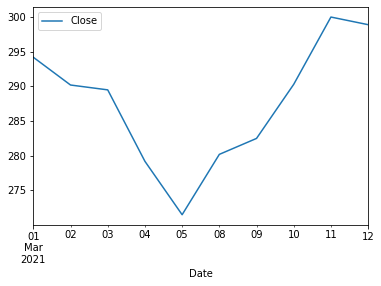

In [77]:
data.reset_index().plot('Date','Close')

Und nun schau dir die allgemeinen Informationen an zur Adidas-Aktie

In [94]:
ads = yf.Ticker("ads.de")
ads.info
ads.info['dividendYield']

0.0107

Ergänze den DAX-DataFrame bitte um den Dividentenrendite `dividendYield`

In [113]:
dividends = []
for idx, row in df_dax.iterrows():
  data = yf.Ticker(row['Ticker symbol'])
  dividend = data.info['dividendYield']
  dividends.append(dividend)
df_dax['Dividend Yield'] = dividends
df_dax.head()

,Company,Prime Standard Sector,Ticker symbol,Index weighting (%)1,Employees,Founded,Divs,Dividend Yield
0,Adidas,Footwear,ADS.DE,4.91,57016.0,1924,0.0107,0.0107
1,Allianz,Financial Services,ALV.DE,7.22,142460.0,1890,0.0447,0.0447
2,BASF,Basic Materials,BAS.DE,4.89,122404.0,1865,0.0472,0.0472
3,Bayer,Healthcare,BAYN.DE,5.52,110838.0,1863,0.0375,0.0375
4,Beiersdorf,Consumer goods,BEI.DE,0.92,20059.0,1882,0.0079,0.0079


Plote die Dividende über alle Aktien

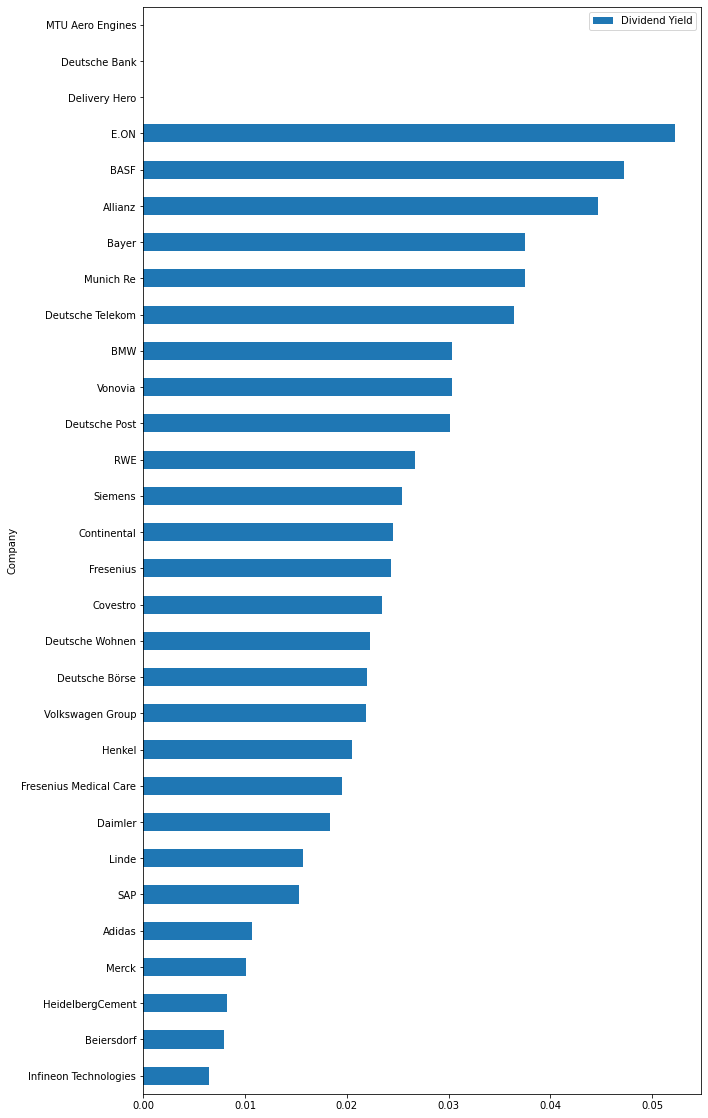

In [134]:
df_dax.sort_values(by=['Dividend Yield']).plot(x = 'Company', y = 'Dividend Yield', kind = 'barh', figsize=(10,20))